<a href="https://colab.research.google.com/github/siddahant/DESOPT/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Name: Siddahant Jain
# Minimize Problem
```
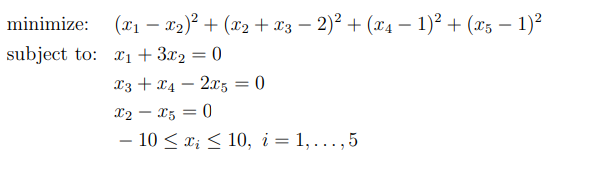

In [1]:
from scipy.optimize import minimize
import random

##Formulate program 

In [2]:
# define objective function
fun = lambda x: (x[0] - x[1]) ** 2 + (x[1] + x[2] - 2) ** 2 + (x[3] - 1) ** 2 + (x[4] - 1) ** 2

# define constraint
const = ({'type': 'eq', 'fun': lambda x: x[0] + 3 * x[1]},
        {'type': 'eq', 'fun': lambda x: x[2] + x[3] - 2 * x[4]},
        {'type': 'eq', 'fun': lambda x: x[1] - x[4]})

# define boundary condition
bnds = ((-10, 10), (-10, 10), (-10, 10), (-10, 10), (-10, 10))

**[Try with first Initial Guess ]**

In [3]:
# set initial guesses
x0 = [0, 10, 2, 0, 10]

# main method
res = minimize(fun, x0, method='SLSQP', bounds=bnds, constraints=const)
print(f"initial guess: {x0}\nAns: {res.x}.")

initial guess: [0, 10, 2, 0, 10]
Ans: [-0.76737248  0.25579083  0.62782498 -0.11624332  0.25579083].


**Evaluate the program with different initial guesses**

In [4]:
#tested with 10 initial guess list between -10 and 10
results=[]
for i in range(1,10):
    random_list = random.sample(range(-10, 10), 5)

    # main method
    res = minimize(fun, random_list, method='SLSQP', bounds=bnds, constraints=const)
    print(f"inital guess: {random_list}\nAns: {res.x}.")
    results.append(res.x)

mean=[]
std=[]
for i in range(len(results[0])):
  temp_list=[]
  diffsquared = 0
  sum_diffsquared = 0
  for row in results:
    temp_list.append(row[i])
  mean.append(sum(temp_list)/len(results))
  for val in temp_list:
    diffsquared = (val-mean[i])**2
    sum_diffsquared = diffsquared + sum_diffsquared
    stddev = ((sum_diffsquared)/len(temp_list))**(1/2) # correct
  std.append(stddev)

inital guess: [1, -2, -3, 6, 5]
Ans: [-0.76713743  0.25571248  0.6277064  -0.11628145  0.25571248].
inital guess: [-5, 0, -3, 2, -10]
Ans: [-0.76715647  0.25571882  0.62809572 -0.11665808  0.25571882].
inital guess: [-8, 0, 9, -4, -10]
Ans: [-0.76733869  0.25577956  0.62799815 -0.11643902  0.25577956].
inital guess: [6, 0, -10, 4, 2]
Ans: [-0.76719902  0.25573301  0.62781967 -0.11635366  0.25573301].
inital guess: [1, -9, 0, 3, 6]
Ans: [-0.76744186  0.25581395  0.62790697 -0.11627906  0.25581395].
inital guess: [9, 1, 8, -10, 6]
Ans: [-0.76744185  0.25581395  0.62790698 -0.11627908  0.25581395].
inital guess: [6, 5, -3, -4, 8]
Ans: [-0.76724244  0.25574748  0.62801993 -0.11652497  0.25574748].
inital guess: [-3, -6, 4, -7, -8]
Ans: [-0.76744184  0.25581395  0.62790698 -0.11627908  0.25581395].
inital guess: [-2, -5, 7, -10, -4]
Ans: [-0.76719598  0.25573199  0.62760937 -0.11614538  0.25573199].


In [5]:
for i in range(len(mean)):
  print(f"mean value of x{i+1}: {mean[i]} and std of x{i+1}: {std[i]}.\n")

mean value of x1: -0.7672883965229036 and std of x1: 0.00012111187469999248.

mean value of x2: 0.2557627988409679 and std of x2: 4.037062490000103e-05.

mean value of x3: 0.6278855733602757 and std of x3: 0.00014491311784264153.

mean value of x4: -0.11635997567833983 and std of x4: 0.00014690463846212337.

mean value of x5: 0.2557627988409679 and std of x5: 4.037062490000103e-05.



## Impact of initial guess

The one sigma standard deviation for each x value **[computed for 10 different initial guess]** was very small ~e-05, so we can conclude that the results converged approximately the same, and error can be considered negligible for most applications.